## Imports 

In [28]:
import torch
from sklearn import datasets
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Utility Functions  

In [17]:
def print_results(y_test, y_pred, x_labels, y_labels):
    accuracy = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    print(f'Accuracy: {accuracy*100:.2f}%')


# Supervised Learning

## Data Setup and Import

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66)

# Scale Data set 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # Fit and transform the training set 
x_test = scaler.transform(x_test) # Transform the test set by the scaler from the trianing set

# Convert arrays to PyTorch tensors 
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create datasets and data loader objects - used for NN
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

Standard Scaler is each element minus the mean of the column divided by the standard deviation of the column shown below 
Z = (x−μ)/σ

## Data Visiualizations 

In [3]:
df = pd.DataFrame(x, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

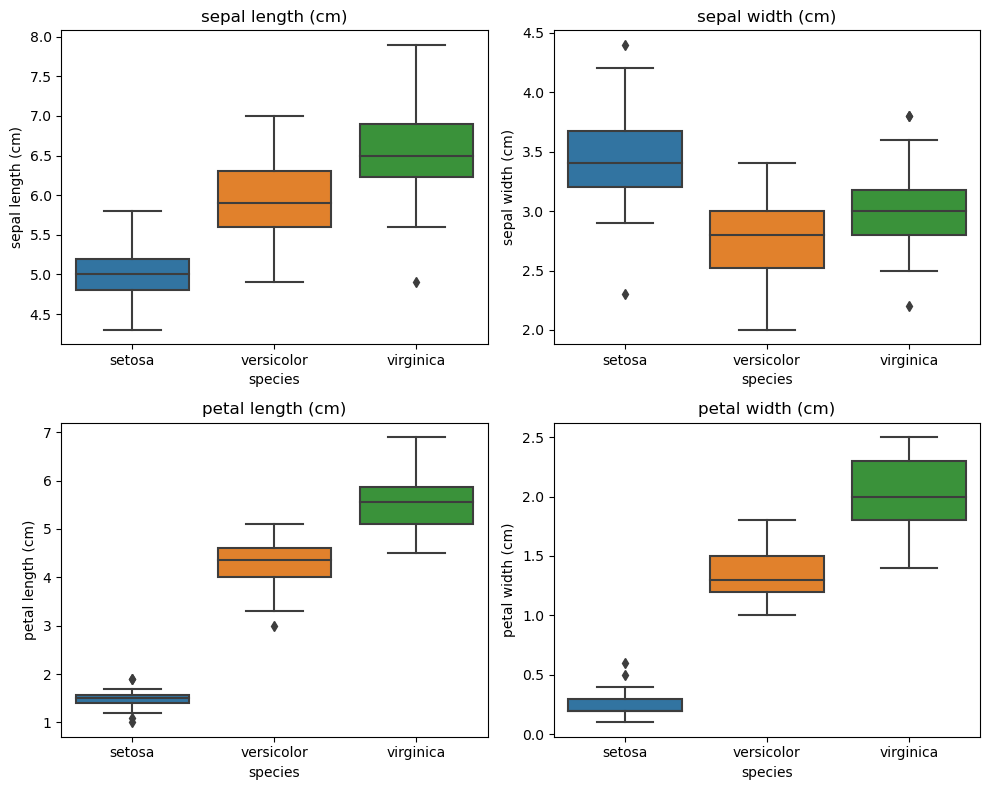

In [5]:
# Box Plot of Features
plt.figure(figsize=(10, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

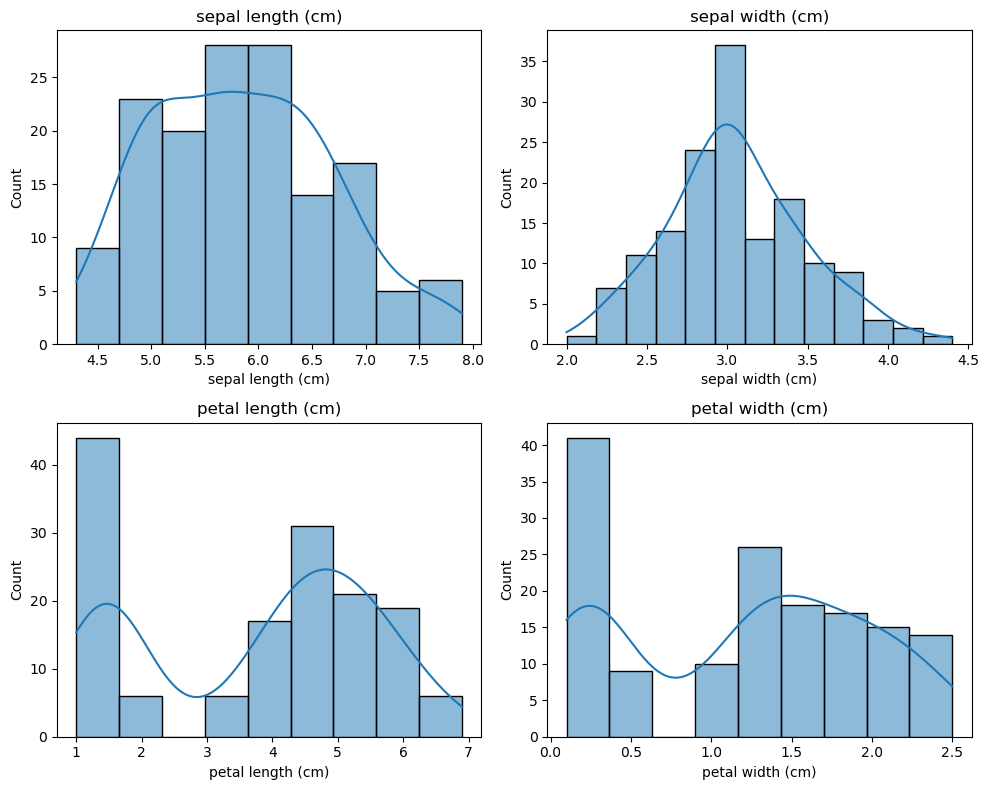

In [6]:
# Feature Distributions
plt.figure(figsize=(10, 8))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()
# Plots both historgram of the data to show distribution and 
# Kernel Density Estimate curve. 

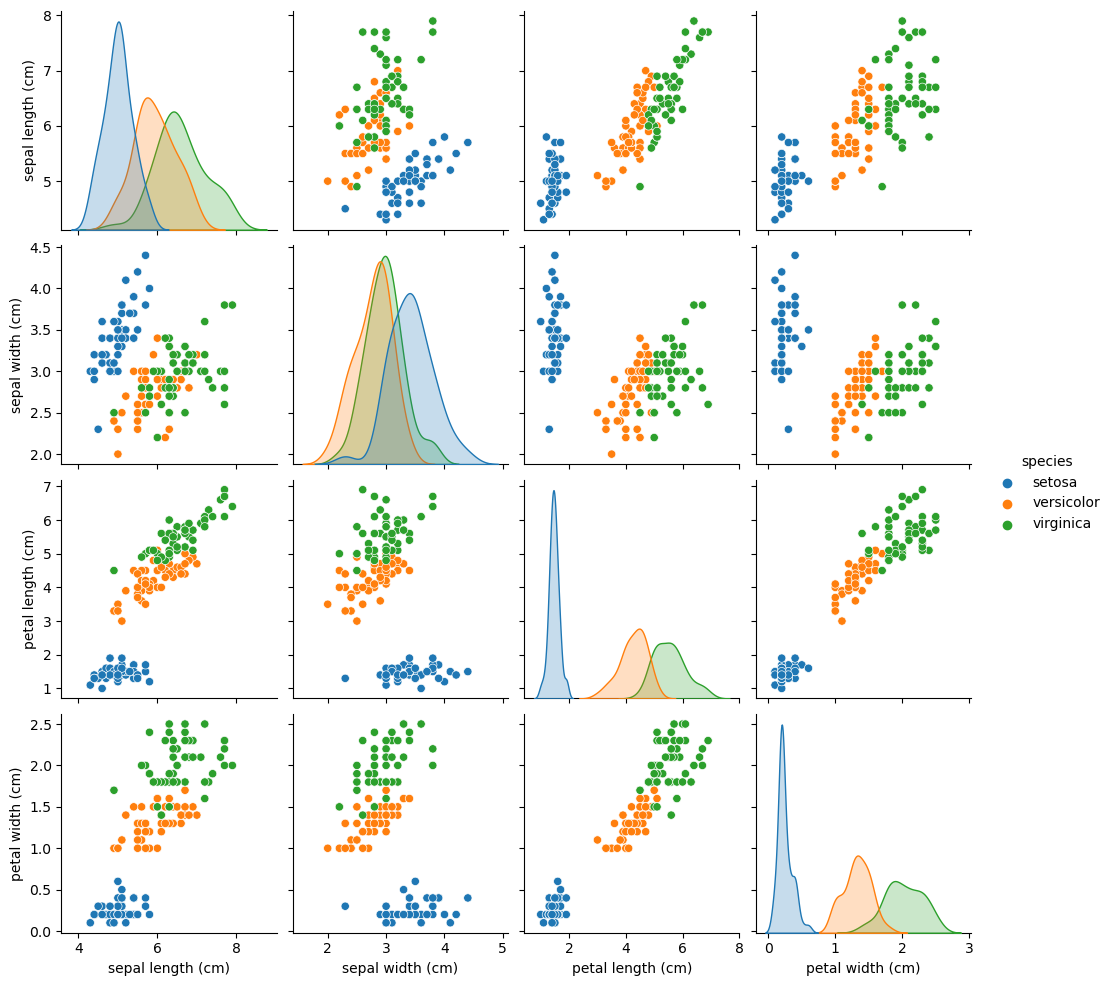

In [7]:
# Pair Plot
sns.pairplot(df, hue='species')
plt.show()

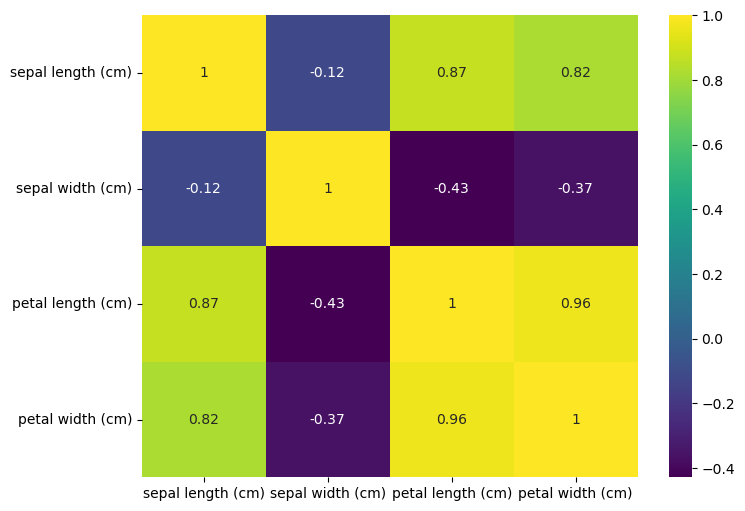

In [8]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='viridis')
plt.show()

## Logistic Regression

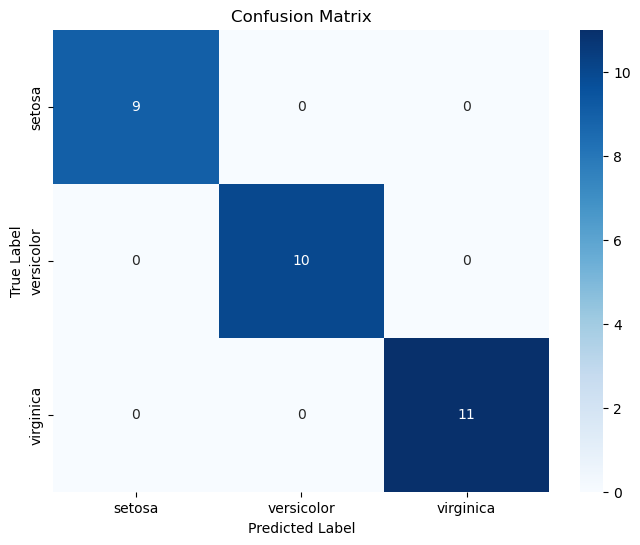

Accuracy: 100.00%


In [18]:
classifier = LogisticRegression(random_state=6)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
x_labels = iris.target_names
y_labels = iris.target_names
print_results(y_test, y_pred, x_labels, y_labels)

## Decision Tree

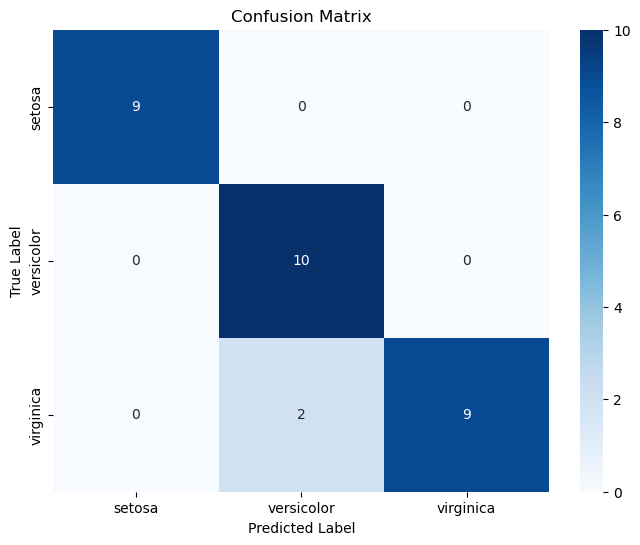

Accuracy: 93.33%


In [20]:
tree_classifier = DecisionTreeClassifier(random_state=0)
tree_classifier.fit(x_train, y_train)
y_pred = tree_classifier.predict(x_test)

x_labels = iris.target_names
y_labels = iris.target_names
print_results(y_test, y_pred, x_labels, y_labels)

## Random Forest

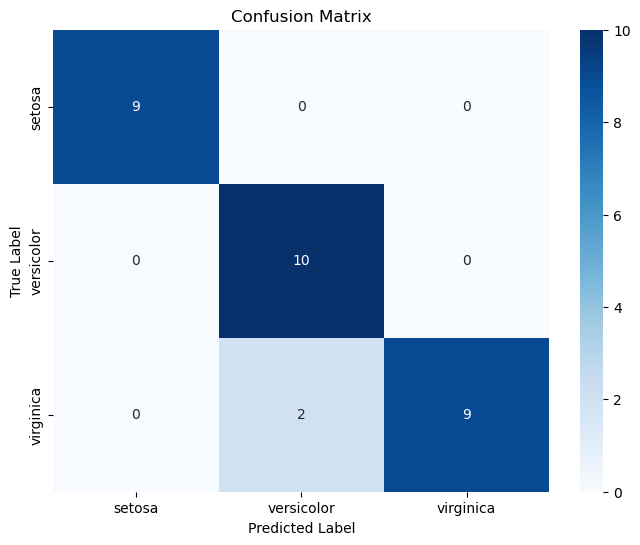

Accuracy: 93.33%


In [23]:
rf_classifier = RandomForestClassifier(n_estimators=42, random_state=0)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)
x_labels = iris.target_names
y_labels = iris.target_names
print_results(y_test, y_pred, x_labels, y_labels)

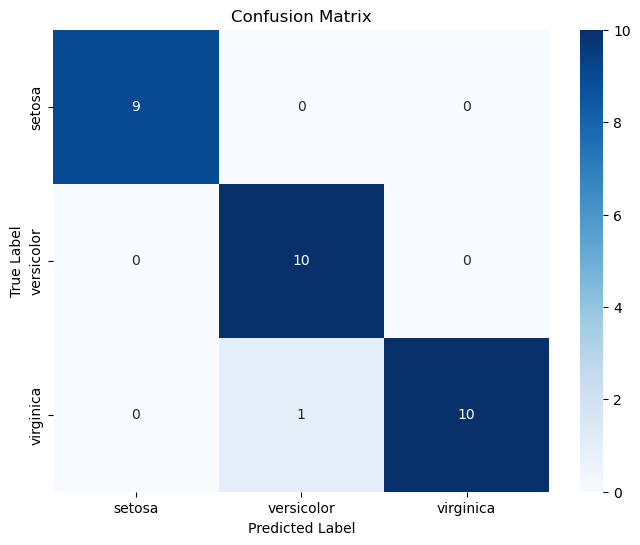

Accuracy: 96.67%


In [24]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test) 
print_results(y_test, y_pred, x_labels, y_labels)

## K-Nearest Neighbors 

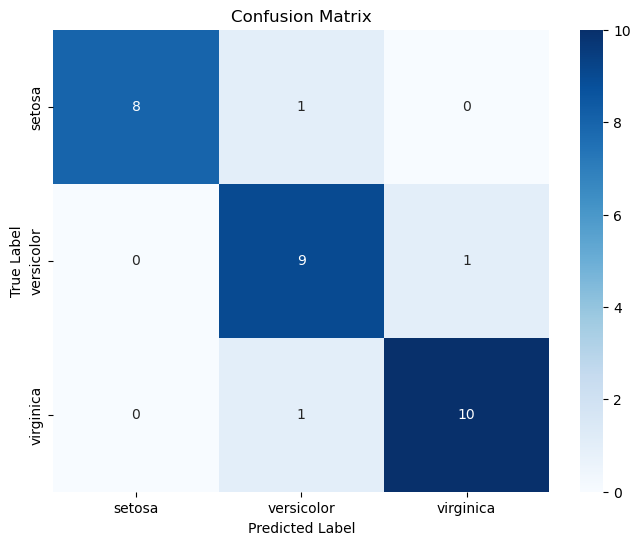

Accuracy: 90.00%


In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_test)
print_results(y_test, y_pred, x_labels, y_labels)

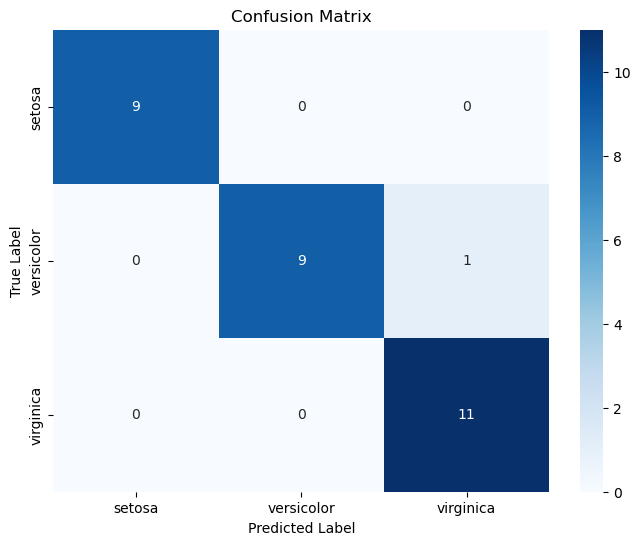

Accuracy: 96.67%


In [27]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_test)
print_results(y_test, y_pred, x_labels, y_labels)

## Nueral Nets

### Most Common Activation Functions 

1. ReLU
    - torch.relu
    - Outputs the input if it is positive; otherwise, it outputs zero.
    
2. Sigmoid 
    - torch.sigmoid
    - outputs a value between 0 and 1, Good for binary classification tasks.

3. Tanh
    - torch.tanh
    - outputs values between -1 and 1. similar to sigmoid but with larger gradients.

4. Softmax
    - torch.nn.functional.softmax
    - used in the final layer of a classifier to obtain probabilities for multi-class classification.


### Loss Functions 

1. Mean Squared Error  Loss
    - torch.nn.MSELoss 
    - Computes the mean squared error between the target and the output, used in regression.
    
2. Cross-Entropy Loss
    - torch.nn.CrossEntropyLoss
    - Combines nn.LogSoftmax() and nn.NLLLoss() in one single class, commonly used for classification tasks.

3. Negative Log-Likelihood  Loss
    - torch.nn.NLLLoss
    - The negative log-likelihood loss, used in conjunction with nn.LogSoftmax() for classification.

4. Binary Cross-Entropy Loss
    - torch.nn.BCELoss
    - Measures the binary cross-entropy between the target and the output probabilities, used for binary classification.

5. Binary Cross-Entropy with Logits Loss
    - torch.nn.BCEWithLogitsLoss
    - Combines a sigmoid layer with the BCELoss in one single class.



In [30]:
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.layer_one = nn.Linear(4, 100) # number of input features, 
        self.layer_two = nn.Linear(100, 3) # number of outputs 

    def forward(self, x):
        x = torch.relu(self.layer_one(x)) # adds relu activation to first layer 
        x = self.layer_two(x)
        return x

    def train_model(self, train_loader, epochs=100, learning_rate=0.001):
        loss_function = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self(inputs)
                loss = loss_function(outputs, labels)
                loss.backward()
                optimizer.step()

            if epoch % 10 == 0:
                print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

    def test_model(self, test_loader):
        self.eval()  # set the model to evaluation mode
        y_pred = []
        y_actual = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = self(inputs)
                _, predicted = torch.max(outputs.data, 1)
                y_pred.extend(predicted.numpy())   
                y_actual.extend(labels.numpy())   

        return y_actual, y_pred


Epoch 1/100, Loss: 0.8999
Epoch 11/100, Loss: 0.4795
Epoch 21/100, Loss: 0.3525
Epoch 31/100, Loss: 0.1151
Epoch 41/100, Loss: 0.1150
Epoch 51/100, Loss: 0.1363
Epoch 61/100, Loss: 0.1003
Epoch 71/100, Loss: 0.0254
Epoch 81/100, Loss: 0.1165
Epoch 91/100, Loss: 0.0151


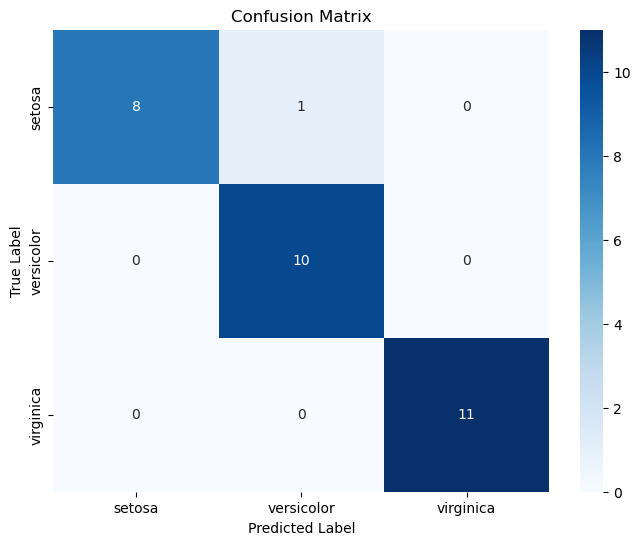

Accuracy: 96.67%


In [31]:
model = IrisNet()

model.train_model(train_loader)

y_actual, y_pred = model.test_model(test_loader)
print_results(y_actual, y_pred, x_labels, y_labels)
